# Clustering using RAPIDS.AI

In [1]:
import cudf

In [2]:
contextual = cudf.read_parquet("../../urbangrammar_samba/temp/contextual.parquet")
contextual

uID  stcOri_meanIQ3  stcOri_rangeIQ3  stcOri_theilID3  \
0            0        8.690215        13.745575         0.333951   
1            1       17.107346        28.356627         0.364632   
2            2        7.699236        16.851171         0.407314   
3            3       19.012996        19.053156         0.119368   
4            4       22.519366        22.271200         0.193274   
...        ...             ...              ...              ...   
506430  507527       19.687929        15.156462         0.128418   
506431  507528       12.812096        18.004769         0.198687   
506432  507529       33.110922        24.847249         0.113949   
506433  507530       16.393865        27.536475         0.298553   
506434  507531        1.102647         1.362494         0.367845   

        sdcLAL_meanIQ3  sdcLAL_rangeIQ3  sdcLAL_theilID3  sdcAre_meanIQ3  \
0           115.638400        43.197802         0.033617     5260.655169   
1            60.961918        70.039744         0.104780     1255.973917   
2            45.145050        32.446339         0.099529      717.559132   
3            95.261736        47.425937         0.032151     2701.697845   
4            78.545408        65.914871         0.081129     1827.189199   
...                ...              ...              ...             ...   
506430      184.452129        47.343257         0.008062    14048.544773   
506431      106.529893        69.976596         0.060260     3816.254174   
506432       54.269134        60.121538         0.132972     1034.006488   
506433      105.057072        76.002043         0.090215     3286.633690   
506434      212.575215         3.573084         0.018600    16921.169111   

        sdcAre_rangeIQ3  sdcAre_theilID3  ...  lddARe_theilID3  \
0           7588.760250         0.174004  ...         0.008113   
1           2621.825395         0.303457  ...         0.008941   
2            932.747991         0.469423  ...         0.807105   
3           2189.293257         0.106185  ...         0.003860   
4           3459.816373         0.332190  ...         0.030171   
...                 ...              ...  ...              ...   
506430     11533.782290         0.111906  ...         0.010786   
506431      5079.873545         0.214102  ...         0.022618   
506432      2241.823786         0.398487  ...         0.088036   
506433      4229.604974         0.239890  ...         0.018372   
506434     14699.228401         0.229188  ...         0.000000   

        sddAre_meanIQ3  sddAre_rangeIQ3  sddAre_theilID3  midRea_meanIQ3  \
0         84128.089976     54502.216490         0.082711       56.000000   
1         16348.304121      6578.714927         0.015081       46.291667   
2         16615.312454      3376.471169         0.042167       32.838710   
3         44432.908576     11912.247415         0.028789       49.000000   
4         46195.334468      7346.767908         0.003133       84.478261   
...                ...              ...              ...             ...   
506430   397608.558320     62749.083652         0.003111       59.923077   
506431    28891.725607     10655.582934         0.026913       19.782609   
506432    21272.508388     40706.759142         0.338119       22.795455   
506433    67684.048652     27161.168313         0.214722       19.250000   
506434        0.000000         0.000000         0.000000        0.000000   

        midRea_rangeIQ3  midRea_theilID3  midAre_meanIQ3  midAre_rangeIQ3  \
0                 41.00         0.055547   209051.361345     81741.748888   
1                 39.00         0.068966    44383.228233     22021.813914   
2                 11.00         0.071209    32471.304686     24619.212867   
3                 18.00         0.030669   132284.092048     54797.623870   
4                100.00         0.173431   134231.364619     98437.630441   
...                 ...              ...             ...              ...   
506430            11.00         0.00

In [3]:
simpson = cudf.read_parquet("../../urbangrammar_samba/temp/contextual_simpson.parquet")
simpson

uID  sscERI_r  ssbERI_r  ltcBuA_r  sssLin_r  sdcLAL_simpson  \
0            0  0.100800  0.000000       0.0  0.717060        0.215420   
1            1  0.105103  0.000000       0.0  0.058288        0.288194   
2            2  0.090206  0.000000       0.0  0.000000        0.414859   
3            3  0.113018  0.000000       0.0  0.005175        0.272977   
4            4  0.074454  0.000000       0.0  0.201423        0.225694   
...        ...       ...       ...       ...       ...             ...   
506430  507527  0.122134  0.000000       0.0  0.054617        0.278107   
506431  507528  0.119167  0.132806       0.0  0.000007        0.175556   
506432  507529  0.267409  0.332704       0.0  0.000019        0.315201   
506433  507530  0.156171  0.388650       0.0  0.000000        0.180800   
506434  507531  0.088841  0.115802       0.0  1.000000        0.722222   

        sdcAre_simpson  mdcAre_simpson  ltcWRB_simpson  sdbAre_simpson  ...  \
0             0.251701        0.242630             1.0        0.346939  ...   
1             0.440972        0.482639             1.0        0.722222  ...   
2             0.484550        0.358317             1.0        0.606838  ...   
3             0.327846        0.418381             1.0        0.928669  ...   
4             0.267361        0.326389             1.0        0.503472  ...   
...                ...             ...             ...             ...  ...   
506430        0.195266        0.266272             1.0        1.000000  ...   
506431        0.228889        0.260000             1.0        0.491111  ...   
506432        0.381944        0.228395             1.0        0.282407  ...   
506433        0.260800        0.350400             1.0        0.414400  ...   
506434        0.222222        0.222222             1.0        0.500000  ...   

        lskERI_simpson  ltkOri_simpson  sdsSPW_simpson  sdsSPO_simpson  \
0             0.827664        0.827664        0.510204        0.637188   
1             1.000000        1.000000        0.312500        0.531250   
2             1.000000        1.000000        0.262327        0.455621   
3             0.514403        0.514403        0.475995        0.802469   
4             0.847222        1.000000        0.607639        0.607639   
...                ...             ...             ...             ...   
506430        1.000000        1.000000        1.000000        1.000000   
506431        0.535556        0.535556        0.315556        0.757778   
506432        0.760802        0.760802        0.418596        0.333719   
506433        0.414400        0.430400        0.356800        0.350400   
506434        1.000000        1.000000        1.000000        1.000000   

        sdsSWD_simpson  sssLin_simpson  mtdDeg_simpson  lcdMes_simpson  \
0             0.827664        0.510204        0.365079        0.528345   
1             0.336806        1.000000        0.513889        0.625000   
2             0.326759        0.739645        0.673899        0.508218   
3             0.303155        1.000000        0.500686        1.000000   
4             0.625000        0.607639        0.468750        0.513889   
...                ...             ...             ...             ...   
506430        1.000000        1.000000        0.502959        0.502959   
506431        0.295556        0.326667        0.662222        0.337778   
506432        0.233410        0.244985        0.384645        0.213735   
506433        0.340800        1.000000        0.481600        0.500800   
506434        1.000000        1.000000        1.000000        1.000000   

        linPDE_simpson  lcnClo_simpson  
0             0.528345        1.000000  
1             0.625000        1.000000  
2             0.480605        1.000000  
3             0.802469        1.000000  
4             1.000000        1.000000  
...                ...             ...  
506430        0.502959        1.000000  
506431        0.328889        0.520000  
506432        0.361497    

In [4]:
data = contextual.set_index('uID').merge(simpson.set_index('uID'), left_index=True, right_index=True)
data.to_parquet("../../urbangrammar_samba/temp/contextual.pq")

In [5]:
data

stcOri_meanIQ3  stcOri_rangeIQ3  stcOri_theilID3  sdcLAL_meanIQ3  \
uID                                                                        
2821         14.251573        12.604014         0.117876       22.232683   
2837         21.684932        23.561173         0.142215       71.838318   
2829         25.653502        26.588017         0.124030       42.660524   
2845         26.778830        13.541424         0.050639      145.208341   
2822         23.262730        19.657578         0.117228       75.959425   
...                ...              ...              ...             ...   
506662       34.406667        14.951780         0.033137       51.188534   
506639       34.218963        18.471795         0.105187       45.821143   
506655       39.132388         5.483711         0.025627      173.331113   
506647       18.832278        24.543039         0.152657       75.546897   
506663        6.828518         7.831790         0.266231      211.055426   

        sdcLAL_rangeIQ3  sdcLAL_theilID3  sdcAre_meanIQ3  sdcAre_rangeIQ3  \
uID                                                                         
2821           7.689148         0.018944      208.052645       145.239419   
2837          60.149059         0.074195     1809.812363      2991.764641   
2829          47.145932         0.106284      613.987885      1265.603307   
2845          62.185703         0.020918     8156.401384      8349.192559   
2822          42.146510         0.061682     2053.204559      2448.277211   
...                 ...              ...             ...              ...   
506662        52.099370         0.113483      962.141888      1574.011500   
506639        54.660761         0.214413      840.866660      2127.768351   
506655        62.531383         0.046353    12807.457557      9954.772660   
506647        51.379572         0.046285     2129.115090      2909.197033   
506663         7.567251         0.000521    27791.252809      9905.615996   

        sdcAre_theilID3  sscCCo_meanIQ3  ...  lskERI_simpson  ltkOri_simpson  \
uID                                      ...                                   
2821           0.067648        0.536881  ...        0.502959        0.526627   
2837           0.237026        0.448897  ...        0.265728        0.254812   
2829           0.431727        0.460126  ...        0.838374        0.878072   
2845           0.128592        0.450378  ...        1.000000        0.739645   
2822           0.313969        0.468781  ...        1.000000        1.000000   
...                 ...             ...  ...             ...             ...   
506662         0.361114        0.492395  ...        0.851801        0.806094   
506639         0.643831        0.495627  ...        0.623967        0.690083   
506655         0.239042        0.528278  ...        0.520000        0.520000   
506647         0.164523        0.484096  ...        0.547091        0.900277   
506663         0.016949        0.783006  ...        1.000000        1.000000   

        sdsSPW_simpson  sdsSPO_simpson  sdsSWD_simpson  sssLin_simpson  \
uID                                                                      
2821          0.516108        0.496384        0.477975        0.950033   
2837          0.254237        0.252514        0.247917        0.782821   
2829          0.339319        0.206994        0.362949        0.741966   
2845          0.730769        0.724852        0.789941        0.795858   
2822          1.000000        1.000000        1.000000        1.000000   
...                ...             ...             ...             ...   
506662        0.580332        0.699446        0.376731        0.612188   
506639        0.381198        0.478306        0.362603        0.525826   
506655        1.000000        1.000000        1.000000        1.000000   
506647        0.182825        0.357341        0.189751        0.500000   
506663        1.000000        1.000000        1.000000        1.000000   

        mtdDe

In [6]:
data = (data-data.mean())/data.std()

In [7]:
data

stcOri_meanIQ3  stcOri_rangeIQ3  stcOri_theilID3  sdcLAL_meanIQ3  \
uID                                                                        
2821         -1.162489        -0.948684         0.091333       -1.202420   
2837         -0.048741         1.194432         0.415085        1.371433   
2829          0.545875         1.786454         0.173184       -0.142495   
2845          0.714484        -0.765335        -0.803051        5.178332   
2822          0.187662         0.430926         0.082717        1.585262   
...                ...              ...              ...             ...   
506662        1.857371        -0.489483        -1.035853        0.299992   
506639        1.829247         0.198998        -0.077455        0.021498   
506655        2.565431        -2.341348        -1.135758        6.637518   
506647       -0.476157         1.386476         0.553986        1.563857   
506663       -2.274694        -1.882086         2.064724        8.594893   

        sdcLAL_rangeIQ3  sdcLAL_theilID3  sdcAre_meanIQ3  sdcAre_rangeIQ3  \
uID                                                                         
2821          -1.256268        -0.944408       -0.608916        -0.764448   
2837           2.389258         1.183834        0.739095         1.622378   
2829           1.485650         2.419895       -0.267289         0.174983   
2845           2.530788        -0.868365        6.080270         6.114610   
2822           1.138231         0.701839        0.943930         1.166661   
...                 ...              ...             ...              ...   
506662         1.829872         2.697187        0.025711         0.433585   
506639         2.007867         6.584939       -0.076352         0.897913   
506655         2.554810         0.111378        9.994514         7.460898   
506647         1.779852         0.108771        1.007815         1.553145   
506663        -1.264738        -1.654046       22.604605         7.419680   

        sdcAre_theilID3  sscCCo_meanIQ3  ...  lskERI_simpson  ltkOri_simpson  \
uID                                      ...                                   
2821          -1.084242        1.055044  ...       -0.625341       -0.705020   
2837           0.949046       -1.720196  ...       -1.621087       -1.842515   
2829           3.286328       -1.366005  ...        0.782527        0.765708   
2845          -0.352646       -1.673494  ...        1.460931        0.186419   
2822           1.872707       -1.092988  ...        1.460931        1.275954   
...                 ...             ...  ...             ...             ...   
506662         2.438655       -0.348166  ...        0.838882        0.464496   
506639         5.832526       -0.246210  ...       -0.117423       -0.020990   
506655         0.973250        0.783680  ...       -0.553812       -0.732753   
506647         0.078692       -0.609937  ...       -0.440099        0.858633   
506663        -1.692860        8.818498  ...        1.460931        1.275954   

        sdsSPW_simpson  sdsSPO_simpson  sdsSWD_simpson  sssLin_simpson  \
uID                                                                      
2821          0.681972        0.057578        0.588409        0.962933   
2837         -0.880287       -1.235674       -0.819431        0.215956   
2829         -0.372707       -1.477064       -0.115494        0.033446   
2845          1.962592        1.269152        2.497486        0.274195   
2822          3.568761        2.728271        3.782944        1.186149   
...                ...             ...             ...             ...   
506662        1.065121        1.134423       -0.031152       -0.546304   
506639       -0.122867       -0.038291       -0.117609       -0.932104   
506655        3.568761        2.728271        3.782944        1.186149   
506647       -1.306314       -0.679772       -1.175382       -1.047477   
506663        3.568761        2.728271        3.782944        1.186149   

        mtdDe

In [8]:
data = data.nans_to_nulls().dropna(axis=1)

In [9]:
from clustergram import Clustergram

In [10]:
%%time
cg = Clustergram(range(1, 30), backend='cuML')
cg.fit(data)

PCA computed in 1.3238763809204102 seconds.
K=1 fitted in 1.9350173473358154 seconds.
K=2 fitted in 4.226783514022827 seconds.
K=3 fitted in 3.7018353939056396 seconds.
K=4 fitted in 3.8030970096588135 seconds.
K=5 fitted in 3.4987809658050537 seconds.
K=6 fitted in 11.407432079315186 seconds.
K=7 fitted in 7.19882607460022 seconds.
K=8 fitted in 9.701780080795288 seconds.
K=9 fitted in 27.675220727920532 seconds.
K=10 fitted in 14.381914854049683 seconds.
K=11 fitted in 33.02939200401306 seconds.
K=12 fitted in 10.51170802116394 seconds.
K=13 fitted in 15.678048849105835 seconds.
K=14 fitted in 16.259235620498657 seconds.
K=15 fitted in 11.787342071533203 seconds.
K=16 fitted in 22.467875957489014 seconds.
K=17 fitted in 12.386485576629639 seconds.
K=18 fitted in 9.655003070831299 seconds.
K=19 fitted in 39.568811655044556 seconds.
K=20 fitted in 21.20641016960144 seconds.
K=21 fitted in 21.696961402893066 seconds.
K=22 fitted in 29.869601011276245 seconds.
K=23 fitted in 41.372116565

In [51]:
import seaborn
import matplotlib.pyplot as plt

seaborn.set(style='whitegrid')

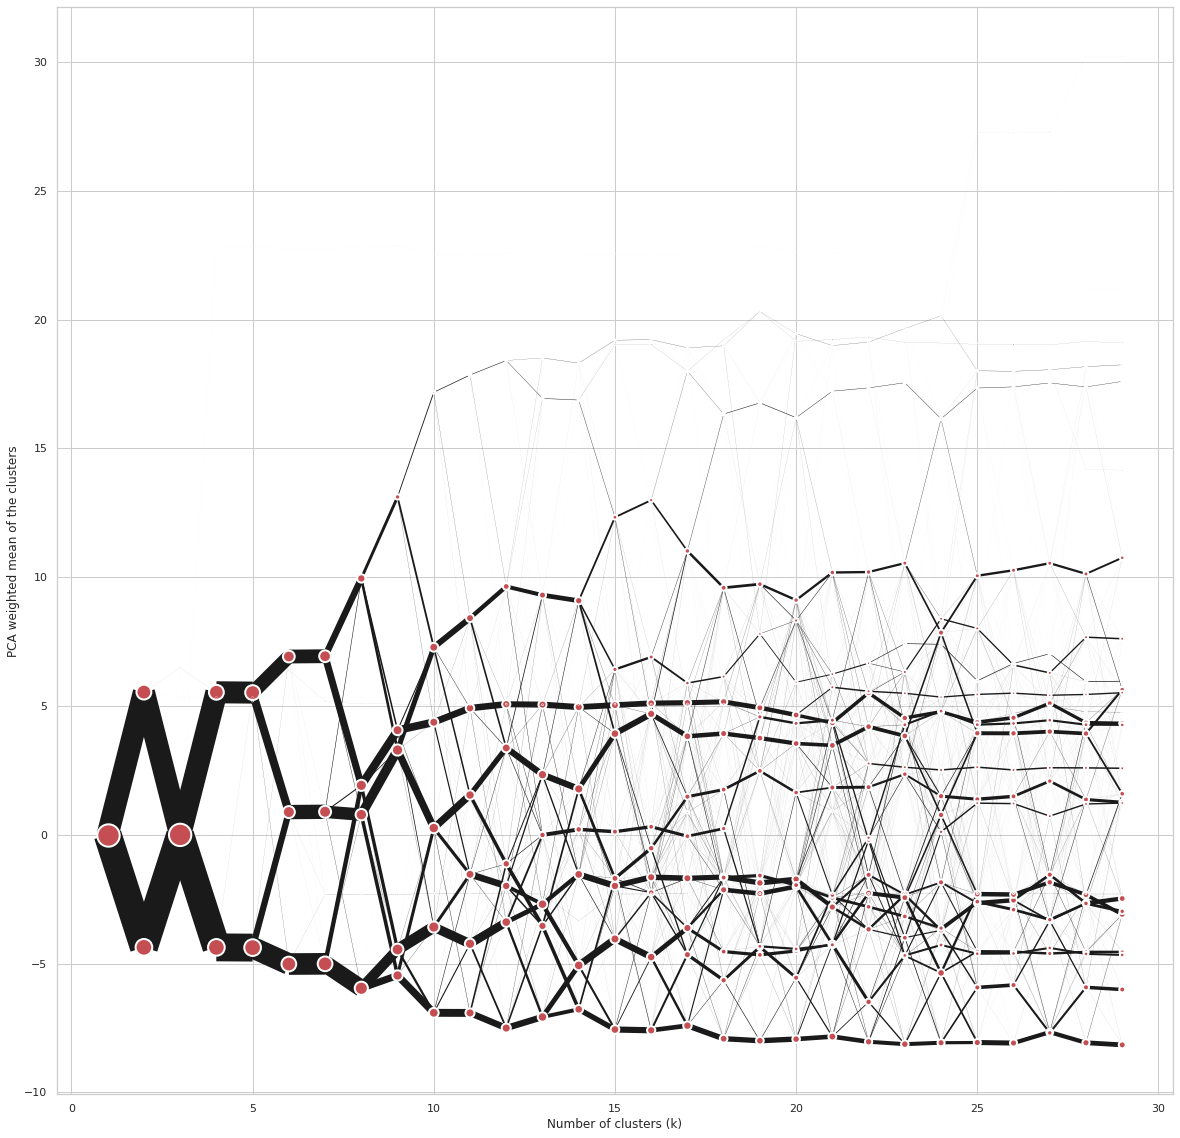

In [52]:
cg.plot(figsize=(20, 20))
plt.savefig("../../urbangrammar_samba/temp/clustergram.pdf")

In [24]:
from cuml import KMeans

km = KMeans(n_clusters=14).fit(data.sort_index())

In [20]:
import geopandas as gpd
gpd.__version__

'0.8.1'

In [21]:
gdf = gpd.read_parquet("../../urbangrammar_samba/temp/buildings.pq")

In [22]:
gdf

geometry     uID      bID  \
0       POLYGON ((243205.898 9870055.931, 243216.504 9...       0      1.0   
1       POLYGON ((257657.888 9870067.574, 257666.019 9...       1      2.0   
2       POLYGON ((257368.929 9870065.245, 257358.678 9...       2      2.0   
3       POLYGON ((253629.817 9870062.184, 253623.106 9...       3      4.0   
4       POLYGON ((256433.829 9870064.623, 256433.900 9...       4      5.0   
...                                                   ...     ...      ...   
507527  POLYGON ((271266.317 9851443.020, 271275.079 9...  507527  12644.0   
507528  POLYGON ((250491.797 9851417.992, 250479.224 9...  507528  12659.0   
507529  POLYGON ((264280.572 9851430.469, 264276.759 9...  507529  12353.0   
507530  POLYGON ((267828.379 9851438.023, 267828.555 9...  507530  12613.0   
507531  POLYGON ((274561.112 9851451.263, 274566.391 9...  507531  12550.0   

             nID  
0        65048.0  
1       108788.0  
2       108683.0  
3        50622.0  
4       108238.0  
...          ...  
507527  114545.0  
507528   90099.0  
507529   89766.0  
507530    3019.0  
507531       NaN  

[507532 rows x 4 columns]

In [29]:
labels = cudf.Series(km.labels_, index=data.sort_index().index)

In [33]:
labels.to_pandas()

uID
0          4
1         11
2         13
3         11
4          4
          ..
507527     9
507528     4
507529     5
507530     5
507531     4
Length: 506435, dtype: int32

In [34]:
gdf['cluster'] = labels.to_pandas()

<AxesSubplot:>

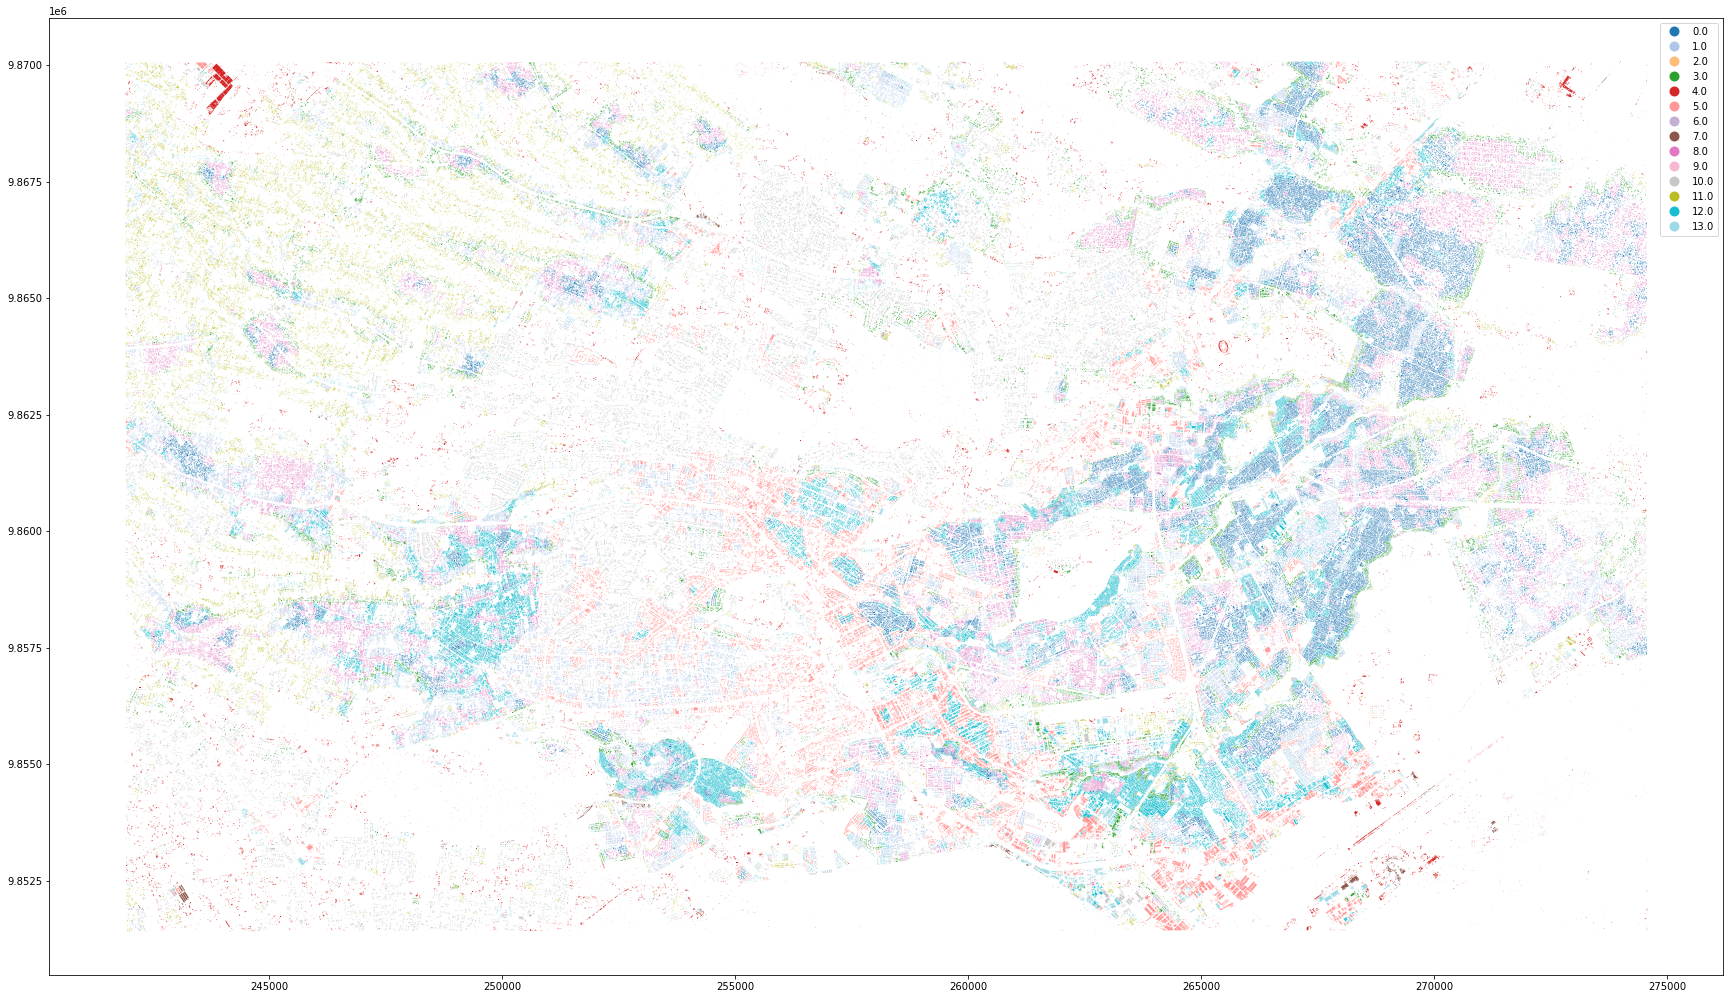

In [44]:
gdf.plot('cluster', categorical=True, cmap='tab20', figsize=(30, 30), legend=True)

In [42]:
seaborn.reset_orig()

In [45]:
km10 = KMeans(n_clusters=10).fit(data.sort_index())

In [46]:
gdf['cluster10'] = cudf.Series(km10.labels_, index=data.sort_index().index).to_pandas()

<AxesSubplot:>

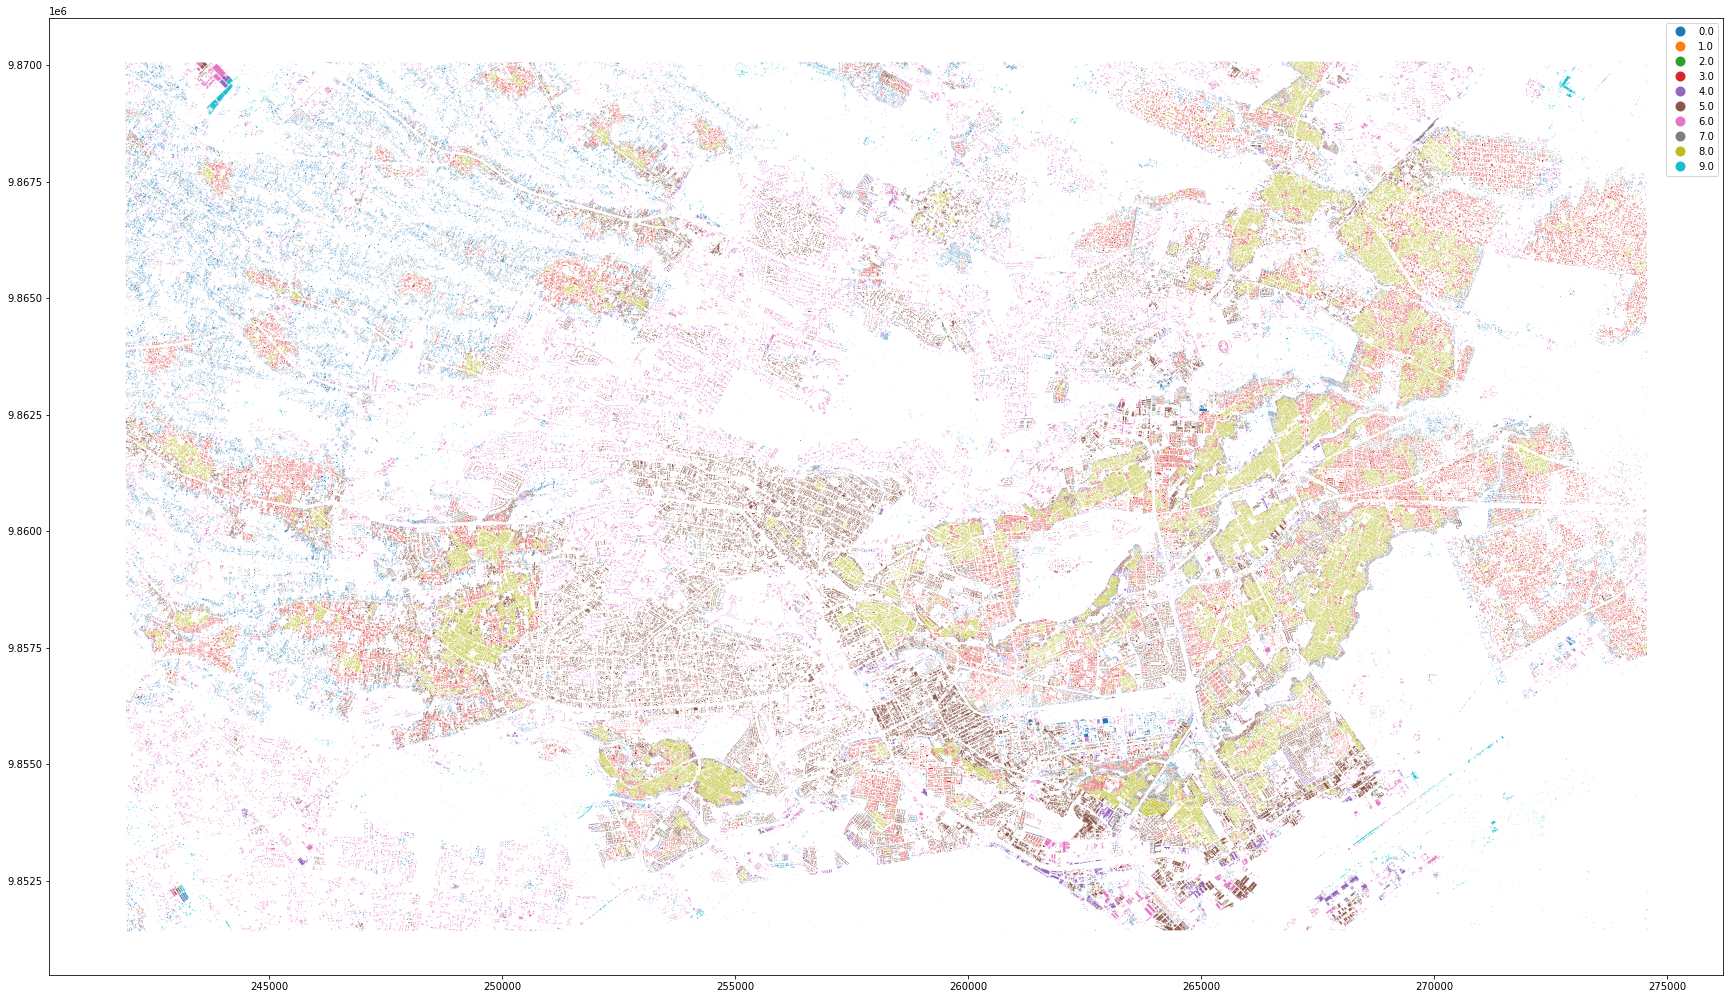

In [47]:
gdf.plot('cluster10', categorical=True, cmap='tab10', figsize=(30, 30), legend=True)

In [50]:
gdf[['uID', 'cluster', 'cluster10']].to_parquet("../../urbangrammar_samba/temp/cluster_labels.pq")